# Assignment 11: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Question 1 (10 Marks)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

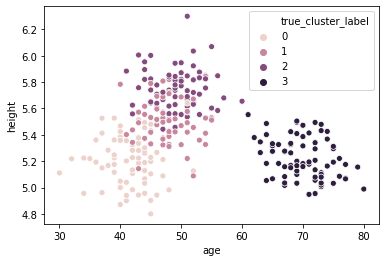

In [2]:
df = pd.read_csv('age_height_data.csv')
df1 = df[['age','height']]
df2 = df[['age','height']]
cols = df1.columns
sns.scatterplot(data=df, x='age', y='height', hue = 'true_cluster_label')

## Question 2 (10 Marks)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

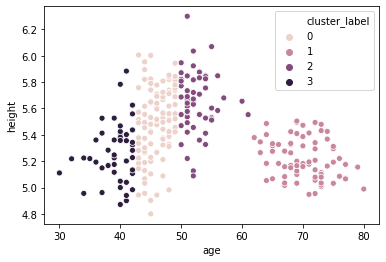

In [3]:
# Let's use a pipeline so we can add preprocessing steps later
cl_pipe = Pipeline([
    ('kmeancl',KMeans(n_clusters=4)) # Name of operator and cluster number
])

# Fit the cluster and predict the label in one step. Calls any preprocessing step plus model
df1['cluster_label'] = cl_pipe.fit_predict(df1)

sns.scatterplot(data=df1, x='age', y='height', hue = 'cluster_label')

## Question 3 (10 Marks)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

The data is plotted based on the true cluster labels. We can see that the decision lines between the clusters are not vertical as the calculated clusters shows. Age and height are not comparable scales. While age can range from 0 to 80, height only ranges from about 4.4 to 7. Since the bigger numbers are on the age axis, the predicted clusters result in vertical decision lines. Ideally, the range of the data types would require age and height to be standarized based on their variances so these differences are accounted for.

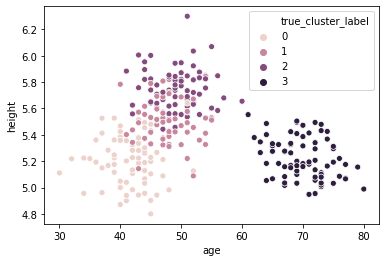

In [4]:
sns.scatterplot(data=df, x='age', y='height', hue = 'true_cluster_label')

## Question 4 (10 Marks)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

The predicted clusters now look more like the true clusters by looking at the decision lines.

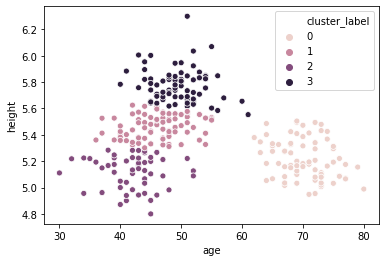

In [5]:
# Let's use a pipeline so we can add preprocessing steps later
c2_pipe = Pipeline([
    ('scale', StandardScaler()),('kmeanc2',KMeans(n_clusters=4)) # Name of operator and cluster number
    ])

# Fit the cluster and predict the label in one step. Calls any preprocessing step plus model
df2['cluster_label'] = c2_pipe.fit_predict(df2)

sns.scatterplot(data=df2, x='age', y='height', hue = 'cluster_label')

## Question 5 (10 Marks)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Hint: If you have a pipeline with a clustering step called `kmeans` in it, you can change the number of clusters, do a new fit, and get the score like so:

```
# Suppose clusters is desired number of clusters,
# and your pipeline is called kmn_pipe, which has
# a k-means step called kmeans:
kmn_pipe.named_steps['kmeans'].set_params(n_clusters = clusters)
kmn_pipe.fit(X)
newscore = (-kmn_pipe.score(X))
```

Create an elbow plot for this data.

For cluster:  3 Change from last score:  277.96438932215597
For cluster:  4 Change from last score:  118.01441396063632
For cluster:  5 Change from last score:  67.97970514155392
For cluster:  6 Change from last score:  21.00896826492101
For cluster:  7 Change from last score:  18.119993618997626
For cluster:  8 Change from last score:  17.487583950884897
For cluster:  9 Change from last score:  14.1769005802335
For cluster:  10 Change from last score:  7.016598500519933
For cluster:  11 Change from last score:  6.957884652320047
For cluster:  12 Change from last score:  3.7574525662071565
For cluster:  13 Change from last score:  3.868807481978891
For cluster:  14 Change from last score:  3.2135880722102783
For cluster:  15 Change from last score:  2.476446231641809
For cluster:  16 Change from last score:  2.9792350643775904
For cluster:  17 Change from last score:  2.8458164158840766


Text(0, 0.5, 'Value of the objective function')

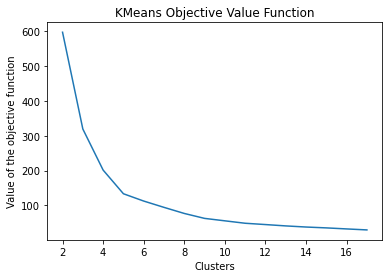

In [6]:
# define the range of the clusters
start = 2
end = int(np.sqrt(df.shape[0]))
scores = []

# loop through the clusters and add their scores to an array
for x in range(start, end+1):
    c2_pipe.named_steps['kmeanc2'].set_params(n_clusters = x)
    c2_pipe.fit(df1)
    score = (-c2_pipe.score(df1))
    scores.append(score)
    # print out the change in score
    if x > 2:
        diff = scores[x-3] - score
        print("For cluster: ", x,"Change from last score: ", diff)

# make the elbow graph
fig, ax = plt.subplots()
ax.plot(range(start, end+1), scores)
ax.set_title("KMeans Objective Value Function")
ax.set_xlabel("Clusters")
ax.set_ylabel("Value of the objective function")

## Question 6 (10 Marks)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

The elbow for this data is at 4 clusters. As shown from the graph and the print statments showing the difference in the value of the objective function, the value stops decreasing significantly after that.

## Question 7 (40 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

Answer here!

1) They seem to conflict with one another as the idea of clustering close by elements together defeats the second requirement of clustering, where the members of each clusters should be similar.

2) Theoreticians tend to detail the run times of their algorithms and share data sets that provide great results instead of talking about the applications for which the algorithm is suitable.

3) Practioners tend have an ad hoc approach to picking their algorithms: they use the more user-friendly, fast, easily available or commonly used algorithms.  

4) As a practioner, my new approach to thinking about which alogrithm to use for clustering would be to consider the combination of requirements and match them up to the tasks of an algorithm that would best suit these needs.
